In [171]:
#Import libraries

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
import math as math
import collections
%matplotlib inline

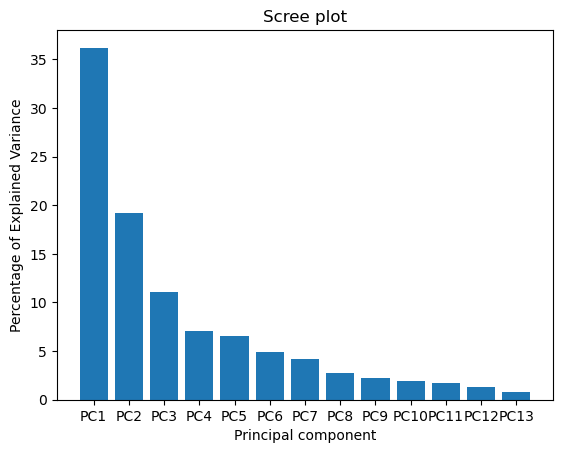

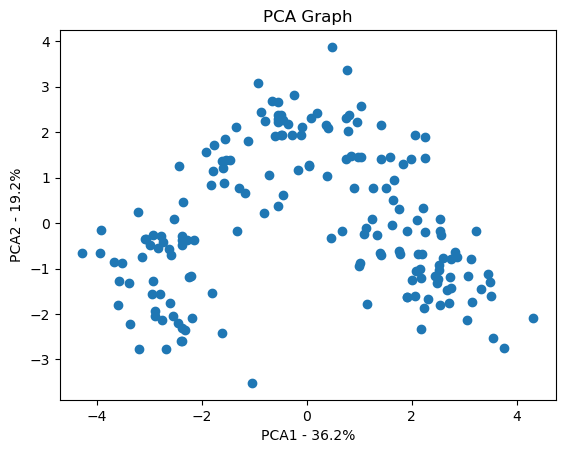

<class 'list'>


In [172]:
#Import, scale, perform PCA and plot data
colnames = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

data = pd.read_csv('WINE.txt', names=colnames, usecols=['2','3','4','5','6','7','8','9','10','11','12','13','14'], delimiter=r"\s+")
#data.iloc[1:].values
data.head()

scaled_data = preprocessing.scale(data)

#------------------------------------------------------------------------------------------------- Creates PCA object and performs the pca calculations ----------------------------------------------------------------------------------------
pca = PCA()
#pca.fit_transform!!!!
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_ *100, decimals = 1)

labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]


#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the SCREE graph -----------------------------------------------------------------
plt.bar(x = range(1,len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

#-------------------------------------------------------------------------------------------------Set up the different values needed for plotting the graph and plot the PCA graph -----------------------------------------------------------------
pca_data = pd.DataFrame(pca_data, index = range(1,len(data)+1), columns = labels)
plt.scatter(pca_data.PC1, pca_data.PC2)
plt.title('PCA Graph')
plt.xlabel('PCA1 - {0}%'.format(per_var[0]))
plt.ylabel('PCA2 - {0}%'.format(per_var[1]))
plt.show()
print(list)

In [173]:
#--------------------------K-means clustering from here--------------------------

#Help functions 


def random_centers(dim, k, len_data):
    centers = []

    for i in range(k):
        center_coordinates = []
        for j in range(dim):
            rand_num = random.uniform(-4,4)
            center_coordinates.append(rand_num) 
        centers.append(center_coordinates)

    return centers

#returns the centroid with the least euclidean distance to data_point
def smallest_centroid_distance(data_point, centers, dims):

    smallest_euc_dist = math.inf
    vector_diff = 0

    for index in range(0, len(centers)):
        
        sum_square = 0
        vector_diff = data_point - centers[index]
        for i in range(0, dims):
            sum_square += vector_diff.iloc[i]**2 
        euclidean_distance = np.sqrt(sum_square)
        if euclidean_distance<smallest_euc_dist:
            smallest_index = index
            smallest_euc_dist = euclidean_distance 
    
    return smallest_euc_dist, smallest_index

def new_centroids(centroid_lists, dims, k):
    
    new_centroids = [[] for x in range(0,k)] #0 for x in range(0,k)
    for i in range(0,k):
        new_centroids[i] = sum(centroid_lists[i])
        new_centroids[i] = np.divide(new_centroids[i], len(centroid_lists[i]))
    
    return new_centroids

def sort_x_y_values(zero_list, one_list, two_list):

    zero_list_x_values = []
    for i in range(len(zero_list)):
        zero_list_x_values.append(zero_list[i][0])

    zero_list_y_values = []
    for i in range(len(zero_list)):
        zero_list_y_values.append(zero_list[i][1])

    one_list_x_values = []
    for i in range(len(one_list)):
        one_list_x_values.append(one_list[i][0])

    one_list_y_values = []
    for i in range(len(one_list)):
        one_list_y_values.append(one_list[i][1])

    two_list_x_values = []
    for i in range(len(two_list)):
        two_list_x_values.append(two_list[i][0])

    two_list_y_values = []
    for i in range(len(two_list)):
        two_list_y_values.append(two_list[i][1])
    
    return zero_list_x_values, zero_list_y_values, one_list_x_values, one_list_y_values, two_list_x_values, two_list_y_values

def scatter_data(zero_list_x_values, zero_list_y_values, one_list_x_values, one_list_y_values, two_list_x_values, two_list_y_values, centroids):
   
    plt.scatter(x = zero_list_x_values, y = zero_list_y_values)

    plt.scatter(x = one_list_x_values, y = one_list_y_values)

    plt.scatter(x = two_list_x_values, y = two_list_y_values)

    plt.scatter(x =[centroids[0][0], centroids[1][0], centroids[2][0]],y =[centroids[0][1], centroids[1][1], centroids[2][1]], marker = "s", edgecolor = "black", s = 50)

    plt.show()

def compare_centroids(centroids, new_centroids):
    counter = 0
    for i in range(0, len(centroids)):
        if collections.Counter(centroids[i]) == collections.Counter(new_centroids[i]):
            counter += 1
    if counter == len(centroids):
        return 1
    return 0        

    

[[-0.27695628201514033, 2.352202787067033], [-0.42049090805477274, 1.8448132548593215], [1.228803705180595, 1.3316506164956747]]


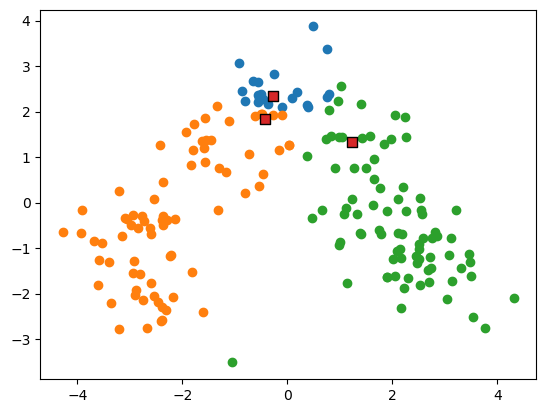

[PC1   -0.103944
PC2    2.192691
dtype: float64, PC1   -2.31392
PC2   -0.50216
dtype: float64, PC1    2.102336
PC2   -0.513833
dtype: float64]


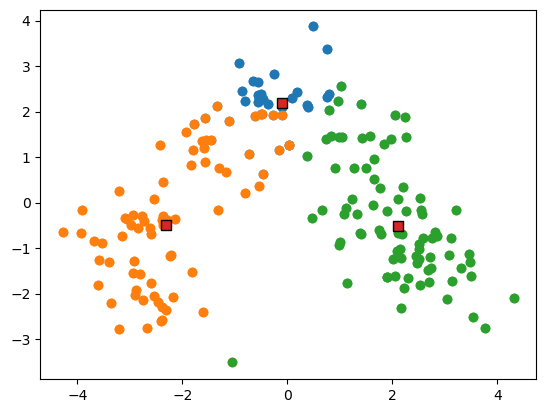

[PC1   -0.085906
PC2    1.921112
dtype: float64, PC1   -2.59607
PC2   -0.95938
dtype: float64, PC1    2.240369
PC2   -0.775162
dtype: float64]


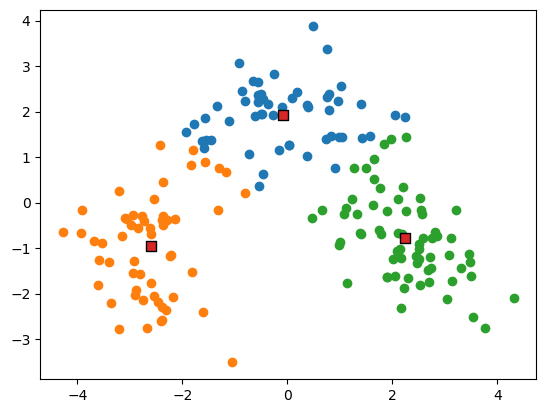

[PC1   -0.100187
PC2    1.790573
dtype: float64, PC1   -2.720036
PC2   -1.125651
dtype: float64, PC1    2.266150
PC2   -0.865592
dtype: float64]


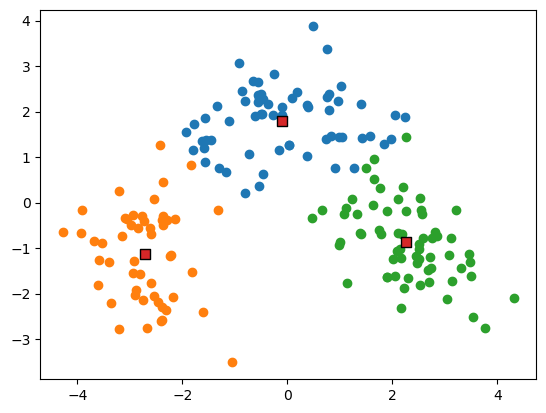

[PC1   -0.162785
PC2    1.767588
dtype: float64, PC1   -2.743930
PC2   -1.214191
dtype: float64, PC1    2.266150
PC2   -0.865592
dtype: float64]


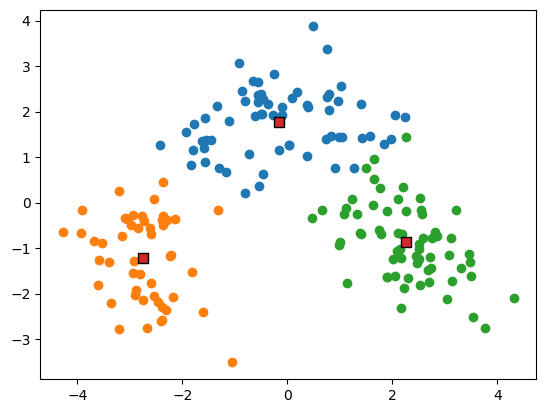

[PC1   -0.162785
PC2    1.767588
dtype: float64, PC1   -2.743930
PC2   -1.214191
dtype: float64, PC1    2.266150
PC2   -0.865592
dtype: float64]


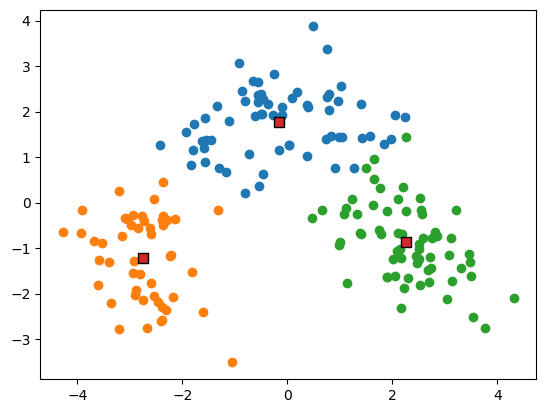

In [174]:
num_dims = 2
num_centroids = 3
centroids = random_centers(num_dims, num_centroids, len(pca_data))
zero_list = []
one_list = []
two_list = []
labels = ['PC' + str(x) for x in range(1, len(per_var) +1)]
last_centroids = centroids

print(centroids)

for point in range(0, len(pca_data)):
    distance, index= smallest_centroid_distance(pca_data.astype(float).iloc[point,0:num_dims].T, centroids, num_dims)
    
    if index == 0:
        zero_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
    elif index == 1:
        one_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
    elif index ==2:
        two_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)

zero_list_x_values, zero_list_y_values, one_list_x_values, one_list_y_values, two_list_x_values, two_list_y_values = sort_x_y_values(zero_list, one_list, two_list)

scatter_data(zero_list_x_values, zero_list_y_values, one_list_x_values, one_list_y_values, two_list_x_values, two_list_y_values, centroids)

centroid_lists = [zero_list, one_list,two_list]
new_centroid = new_centroids(centroid_lists, num_dims, num_centroids)
while True:

    for point in range(0, len(pca_data)):
        distance, index= smallest_centroid_distance(pca_data.astype(float).iloc[point,0:num_dims].T, new_centroid, num_dims)
        
        if index == 0:
            zero_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
        elif index == 1:
            one_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
        elif index ==2:
            two_list.append(pca_data.astype(float).iloc[point,0:num_dims].T)
    
    centroid_lists = [zero_list, one_list,two_list]

    zero_list_x_values, zero_list_y_values, one_list_x_values, one_list_y_values, two_list_x_values, two_list_y_values = sort_x_y_values(zero_list, one_list, two_list)

    new_centroid = new_centroids(centroid_lists, num_dims, num_centroids)
    print(new_centroid)

    scatter_data(zero_list_x_values, zero_list_y_values, one_list_x_values, one_list_y_values, two_list_x_values, two_list_y_values, new_centroid)

    zero_list = []
    two_list = []
    one_list = []
    if(compare_centroids(new_centroid, last_centroids) == 1):
        break
    last_centroids = new_centroid
